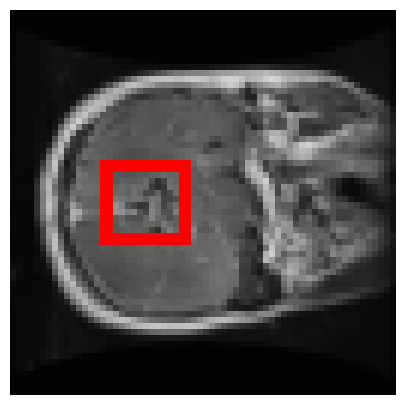

In [23]:
import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import *


train_loader,val_loader=create_dataloader((64,64),batch_size=128)



In [24]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, inputs, targets):
        # Flatten the tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        # Calculate intersection and union
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + self.smooth) / (inputs.sum() + targets.sum() + self.smooth)
        
        return 1 - dice

In [25]:
import torch
import train 
importlib.reload(train)
from train import training_loop


    

model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)


# Define the optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
loss_fn= DiceLoss()
unet_metrics=training_loop(model, optimizer, loss_fn, train_loader, val_loader, num_epochs=3)
# Train the model


Using cache found in /Users/anton_heden/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


Starting training


  0%|          | 0/12 [00:07<?, ?it/s]


KeyboardInterrupt: 

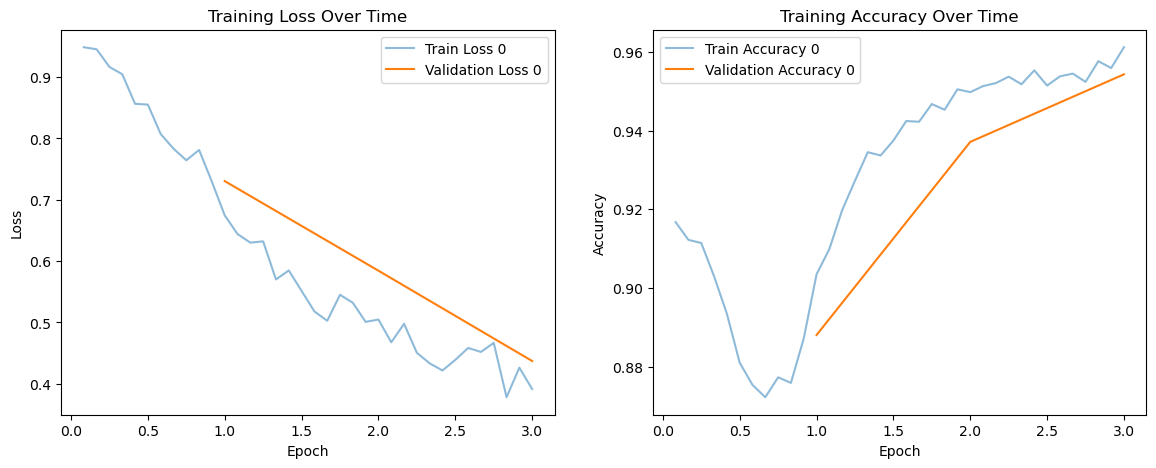

In [6]:
import visualisation
importlib.reload(visualisation)
from visualisation import *
save_model_to_file(unet_metrics, 'unet_brain_mri_seg.pth')


plot_training([unet_metrics])

0.0


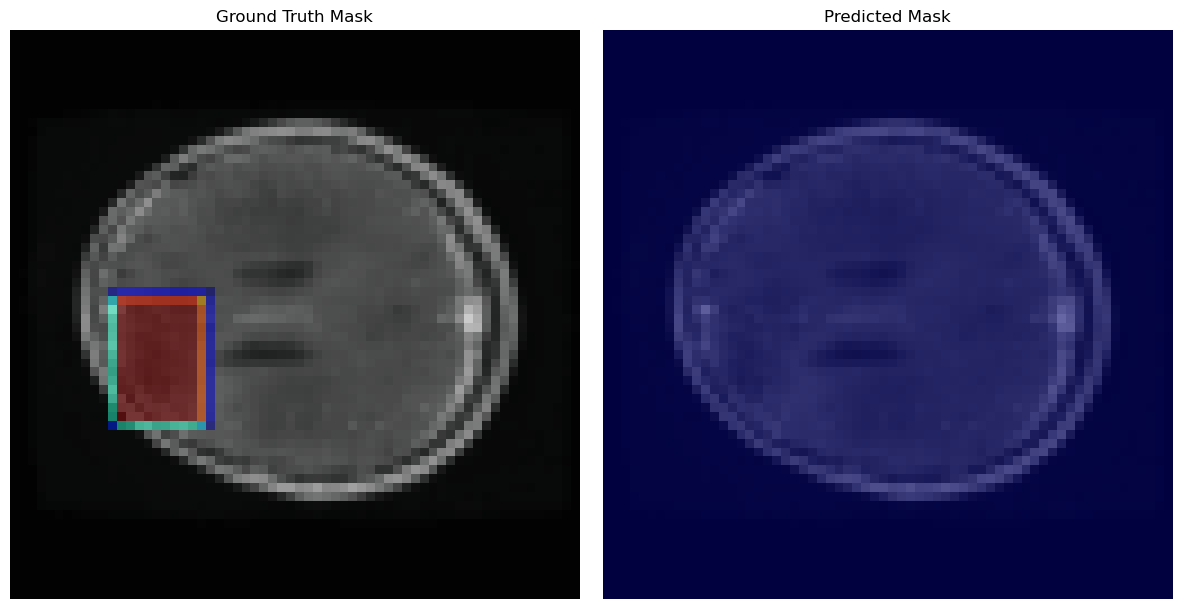

In [13]:
import visualisation
importlib.reload(visualisation)
from visualisation import *
# Load the model and performance metrics
model, train_losses, train_accs, val_losses, val_accs = get_model_and_performance_metrics("unet_brain_mri_seg.pth", model)


# Get the validation dataset
val_dataset = val_loader.dataset

# Plot comparison for a specific index
plot_comparison(0, val_dataset, model)